<a href="https://colab.research.google.com/github/ederson-hub/Dio-Machine-Learning/blob/main/Recomenda%C3%A7%C3%A3oPorImagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descompactar o dataset

### Subtask:
Extrair as imagens do arquivo `fashion.zip`.


In [1]:
import zipfile
import os

zip_file_path = '/content/fashion.zip'
extracted_dir = '/content/fashion'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

print(f"Files extracted to {extracted_dir}")

Files extracted to /content/fashion


## Preparar os dados

### Subtask:
Carregar as imagens e seus rótulos para uso no treinamento.


In [2]:
import os
from PIL import Image

image_dir = '/content/fashion'
image_paths = []
for filename in os.listdir(image_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        image_paths.append(os.path.join(image_dir, filename))

print(f"Found {len(image_paths)} images.")

Found 858 images.


## Carregar um modelo pré-treinado

### Subtask:
Utilizar um modelo de Deep Learning pré-treinado para a extração de características.


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

# Load the pre-trained ResNet50 model without the top fully-connected layer
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Extrair características das imagens

### Subtask:
Processar as imagens do dataset para obter suas representações numéricas (embeddings) usando o modelo pré-treinado.


In [4]:
import numpy as np

def extract_features(image_path):
    """Extracts features from an image using the pre-trained ResNet50 model."""
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = tf.keras.applications.resnet50.preprocess_input(expanded_img_array)
    features = model.predict(preprocessed_img)
    return features

image_features = []
for image_path in image_paths:
    features = extract_features(image_path)
    image_features.append(features)

image_features = np.array(image_features)
print(f"Extracted features for {len(image_features)} images.")
print(f"Shape of extracted features: {image_features.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

## Busca por similaridade

### Subtask:
Encontrar imagens similares com base nas características extraídas, usando similaridade de cosseno.


In [5]:
from sklearn.metrics.pairwise import cosine_similarity

# Reshape the image_features array to be 2D
image_features_2d = image_features.reshape(image_features.shape[0], -1)

# Calculate the pairwise cosine similarity between all image features
similarity_matrix = cosine_similarity(image_features_2d)

print("Similarity matrix calculated.")
print(f"Shape of similarity matrix: {similarity_matrix.shape}")

Similarity matrix calculated.
Shape of similarity matrix: (858, 858)


## Upload de imagem

### Subtask:
Permitir que o usuário faça upload de uma imagem para ser usada como consulta.


In [6]:
from google.colab import files

uploaded = files.upload()

Saving relogio01.jpeg to relogio01.jpeg


## Processar a imagem de upload

### Subtask:
Extrair as características da imagem de upload usando o mesmo modelo pré-treinado.


In [7]:
import io
from PIL import Image

# Access the uploaded image data
uploaded_filename = list(uploaded.keys())[0]
uploaded_image_data = uploaded[uploaded_filename]

# Load the image from bytes data using PIL
uploaded_image = Image.open(io.BytesIO(uploaded_image_data))

# Resize the image to the target size (224x224)
target_size = (224, 224)
uploaded_image_resized = uploaded_image.resize(target_size)

# Convert the image to a NumPy array
uploaded_img_array = tf.keras.preprocessing.image.img_to_array(uploaded_image_resized)

# Expand the dimensions of the image array
expanded_uploaded_img_array = np.expand_dims(uploaded_img_array, axis=0)

# Preprocess the image array
preprocessed_uploaded_img = tf.keras.applications.resnet50.preprocess_input(expanded_uploaded_img_array)

# Use the pre-trained model to predict the features
uploaded_image_features = model.predict(preprocessed_uploaded_img)

print(f"Extracted features for the uploaded image.")
print(f"Shape of uploaded image features: {uploaded_image_features.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
Extracted features for the uploaded image.
Shape of uploaded image features: (1, 2048)


## Realizar a busca de similaridade com a imagem de upload

### Subtask:
Encontrar as imagens mais similares no dataset com base nas características da imagem de upload.


In [8]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between uploaded image features and dataset image features
similarity_scores = cosine_similarity(uploaded_image_features.reshape(1, -1), image_features_2d)

# Get the indices of the top 5 most similar images
# Flatten the similarity scores array to easily get indices
similarity_scores_flat = similarity_scores.flatten()

# Sort the indices in descending order of similarity
sorted_indices = np.argsort(similarity_scores_flat)[::-1]

# Get the top 5 indices (excluding the first one which is the uploaded image itself if it's in the dataset,
# but in this case, it's not in the dataset, so we take the top 5 directly)
top_5_similar_indices = sorted_indices[:5]

print("Top 5 similar image indices found.")
print(top_5_similar_indices)

Top 5 similar image indices found.
[163 563 717 396 549]


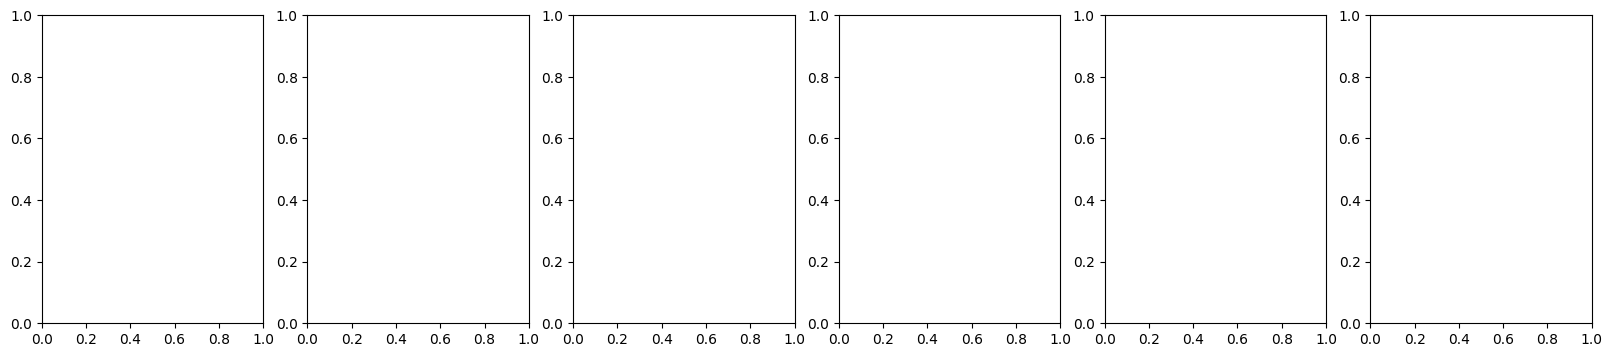

In [9]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axes = plt.subplots(1, 6, figsize=(20, 4))

In [10]:
import tensorflow as tf

# Display the uploaded image
axes[0].imshow(uploaded_image)
axes[0].set_title("Uploaded Image")
axes[0].axis('off')

# Display the top 5 similar images
for i, index in enumerate(top_5_similar_indices):
    img_path = image_paths[index]
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=target_size)
    axes[i+1].imshow(img)
    axes[i+1].set_title(f"Similar Image {i+1}")
    axes[i+1].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>